# SI140 Probability & Mathematical Statistics
## Homework 9
## 陈昱聪 ChenYucong  ><E<>N
 - Student ID: 2019533079
 - Email: chenyc@shanghaitech.edu.cn
 
# *ShanghaiTech University*           SIST
### Group 2 (TA: 曾理)

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
font1 = {'family': 'serif',
        'weight': 'normal',
        'size': 12,
        }
plt.style.use('ggplot')

****
****
# Q1

## Q1.1

In [161]:
num_game = 10000
num_balls = 100000

box = np.array([])

for i in range(num_game):
    X = np.random.rand(2, num_balls)
    box = np.append(box, np.sum((X[0]**2 + X[1]**2 < 1)) / num_balls)
box *= 4

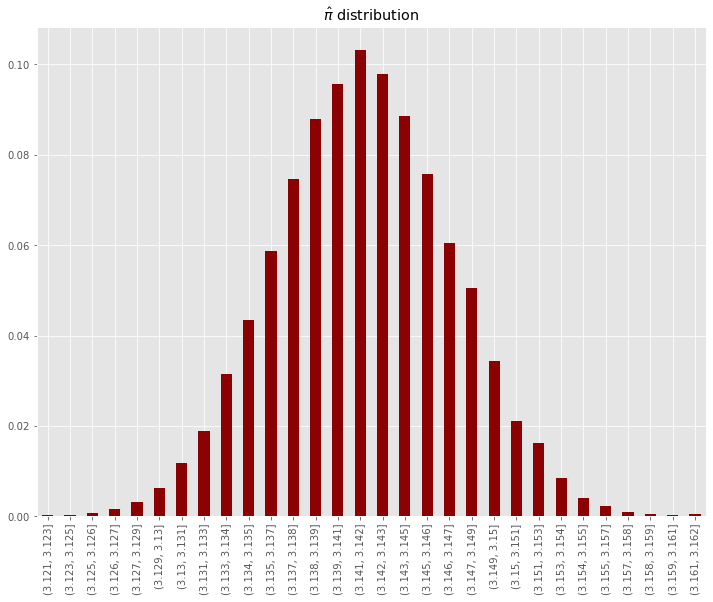

The mean of pi_hat is: 3.14156


In [162]:
bbox = pd.DataFrame({'box':box})
distrib = bbox['box'].value_counts(bins = 30, sort = False, normalize = True)

distrib.plot(kind = 'bar', figsize = (12, 9), title = r'$\hat{\pi}$ distribution', color = 'darkred')

plt.show()

print('The mean of pi_hat is: %.5f' % box.mean())

## Q1.2

Take the confidence Interval as 1 - $\sigma = 0.95$.

Using Hoeffding Bound, $$P(|\hat{\pi} - \pi|\geqslant \epsilon) \leqslant 2e^{-\frac{1}{8}n\epsilon^2}$$
Let $\sigma = 2e^{-\frac{1}{8}n\epsilon^2}$, we have $\epsilon = \sqrt{\frac{8\ln{\frac{2}{\sigma}}}{n}}$
By taking $n = 100000$, we get $\epsilon = 0.01718$

In [163]:
epsilon = sqrt(8*log(2/0.05)/num_balls)

out_bound = sum(distrib < pi - epsilon) + sum(distrib > pi - epsilon)

if (out_bound / num_game <= 0.95):
    print('Bounds: ', '(', pi - epsilon, pi + epsilon, ')', ' Prob is: ', out_bound / num_game, '<', 0.05)
    print("CHECKED")

Bounds:  ( 3.1244138772559236 3.1587714299236627 )  Prob is:  0.003 < 0.05
CHECKED


So we hold the inequality, the bounds are checked.

****
****
# Q2

## Q2.1

### Box-Muller

In [164]:
U = np.random.rand(2, 100000)
###BOX-Muller###
X = np.sqrt(-2*np.log(U[0]))*np.cos(2*pi*U[1])
Y = np.sqrt(-2*np.log(U[0]))*np.sin(2*pi*U[1])
###BOX-Muller###
rvs = pd.DataFrame({'X':X,'Y':Y,'U1':U[0],'U2':U[1]})
U1_distrib = rvs['U1'].value_counts(bins = 30,sort = False, normalize = True)
U2_distrib = rvs['U2'].value_counts(bins = 30,sort = False, normalize = True)
X_distrib = rvs['X'].value_counts(bins = 30,sort = False, normalize = True)
Y_distrib = rvs['Y'].value_counts(bins = 30,sort = False, normalize = True)

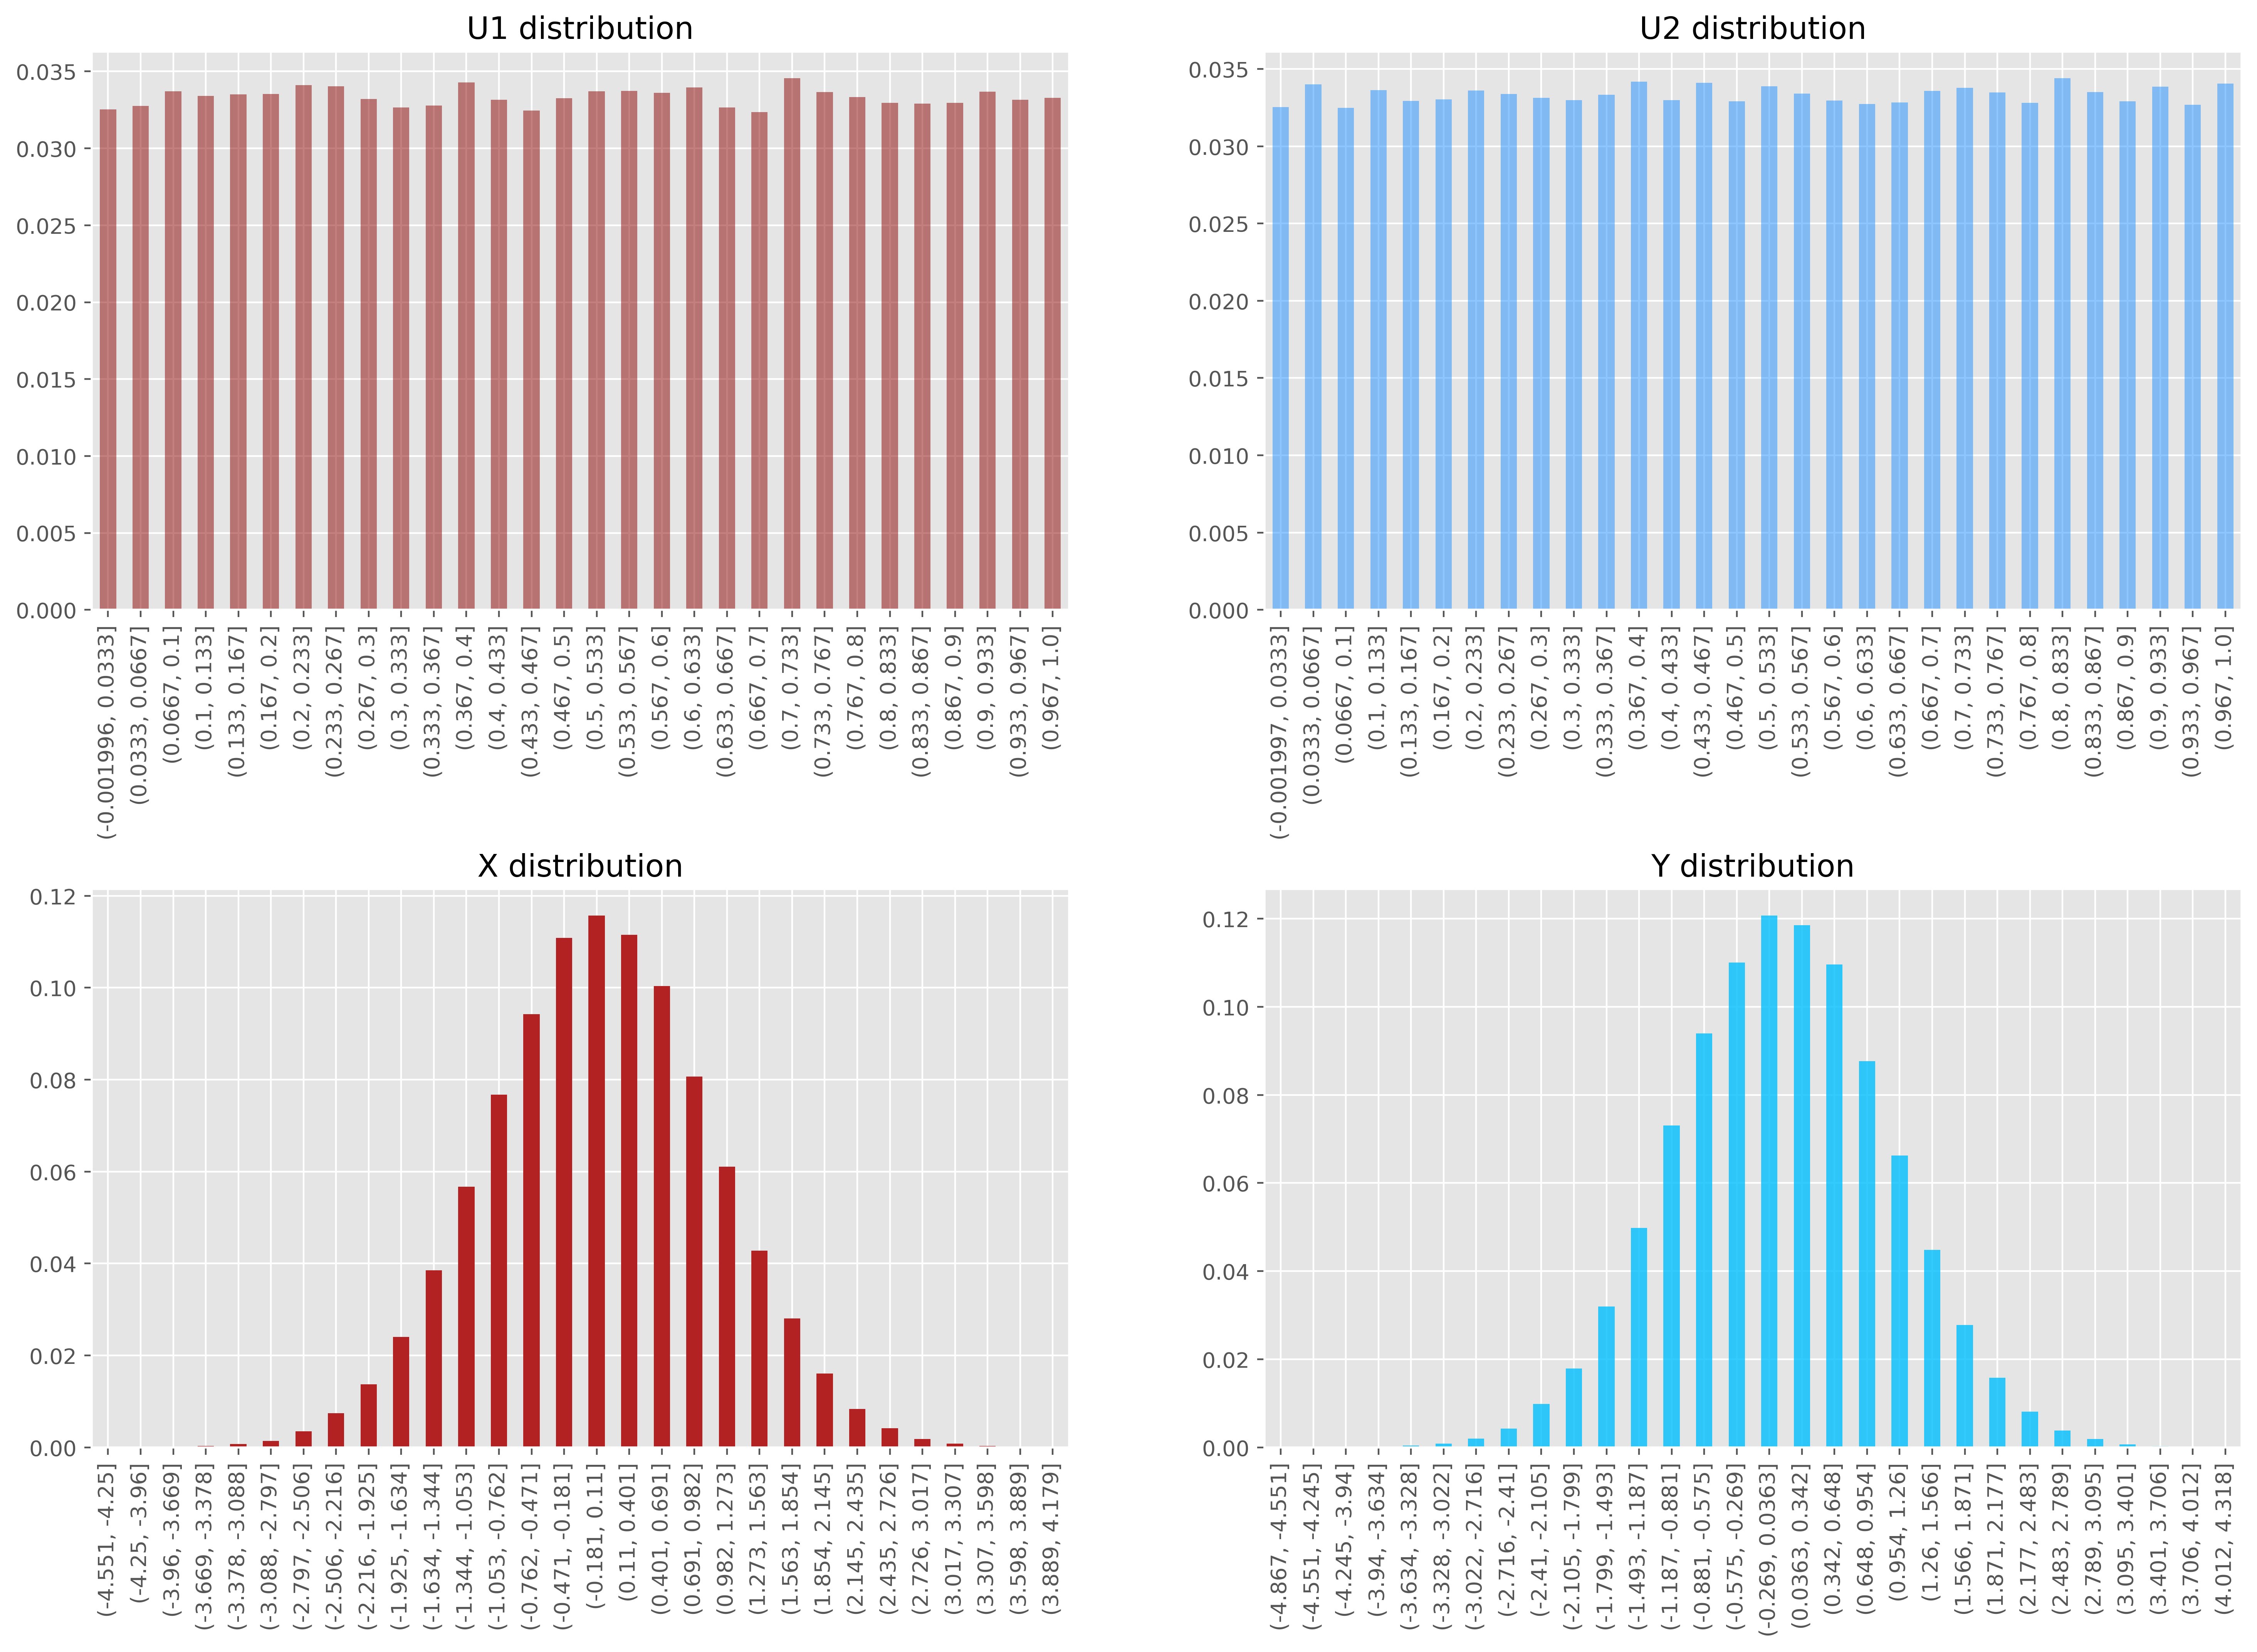

In [165]:
fig, ax = plt.subplots(2, 2, figsize=(18,12), dpi = 400)
cs1 = U1_distrib.plot(kind = 'bar', ax = ax[0][0], color = 'darkred', alpha = 0.5, title = 'U1 distribution')
cs2 = U2_distrib.plot(kind = 'bar', ax = ax[0][1], color = 'dodgerblue', alpha = 0.5, title = 'U2 distribution')
cs3 = X_distrib.plot(kind = 'bar', ax = ax[1][0], color = 'firebrick', title = 'X distribution')
cs4 = Y_distrib.plot(kind = 'bar', ax = ax[1][1], color = 'deepskyblue', alpha = 0.8, title = 'Y distribution')
plt.subplots_adjust(hspace =0.5)

### Acceptance-Rejection

Let $Y\sim \text{Expo}(1)$, $g(x) =  e^{-x}$, $0<x<+\infty$

Let $Z\sim \text{N}(0, 1)$ to be generated

Let $X = |Z|$ to be generated, $f_X(x) = \frac{2}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$, $0<x<+\infty$

Then $c = \text{sup}_x \frac{f_X(x)}{g(x)} = \text{sup}_x\frac{\frac{2}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}{e^{-x}} = \sqrt{\frac{2e}{\pi}}$

So $lim = \frac{f_X(x)}{c\cdot g(x)} = e^{-\frac{(x-1)^2}{2}}$

In [166]:
num = 100000

U = np.random.rand(3, num)

X = []

# Inverse-Transform
Y = -np.log(U[0])

lim = np.exp((-(Y-1)**2)/2)

for i in range(100000):
    if U[1][i] <= lim[i]:
        c = 1
        if U[2][i] < 0.5:
            c = -1
        X.append(c*Y[i])
X = np.array(X)  

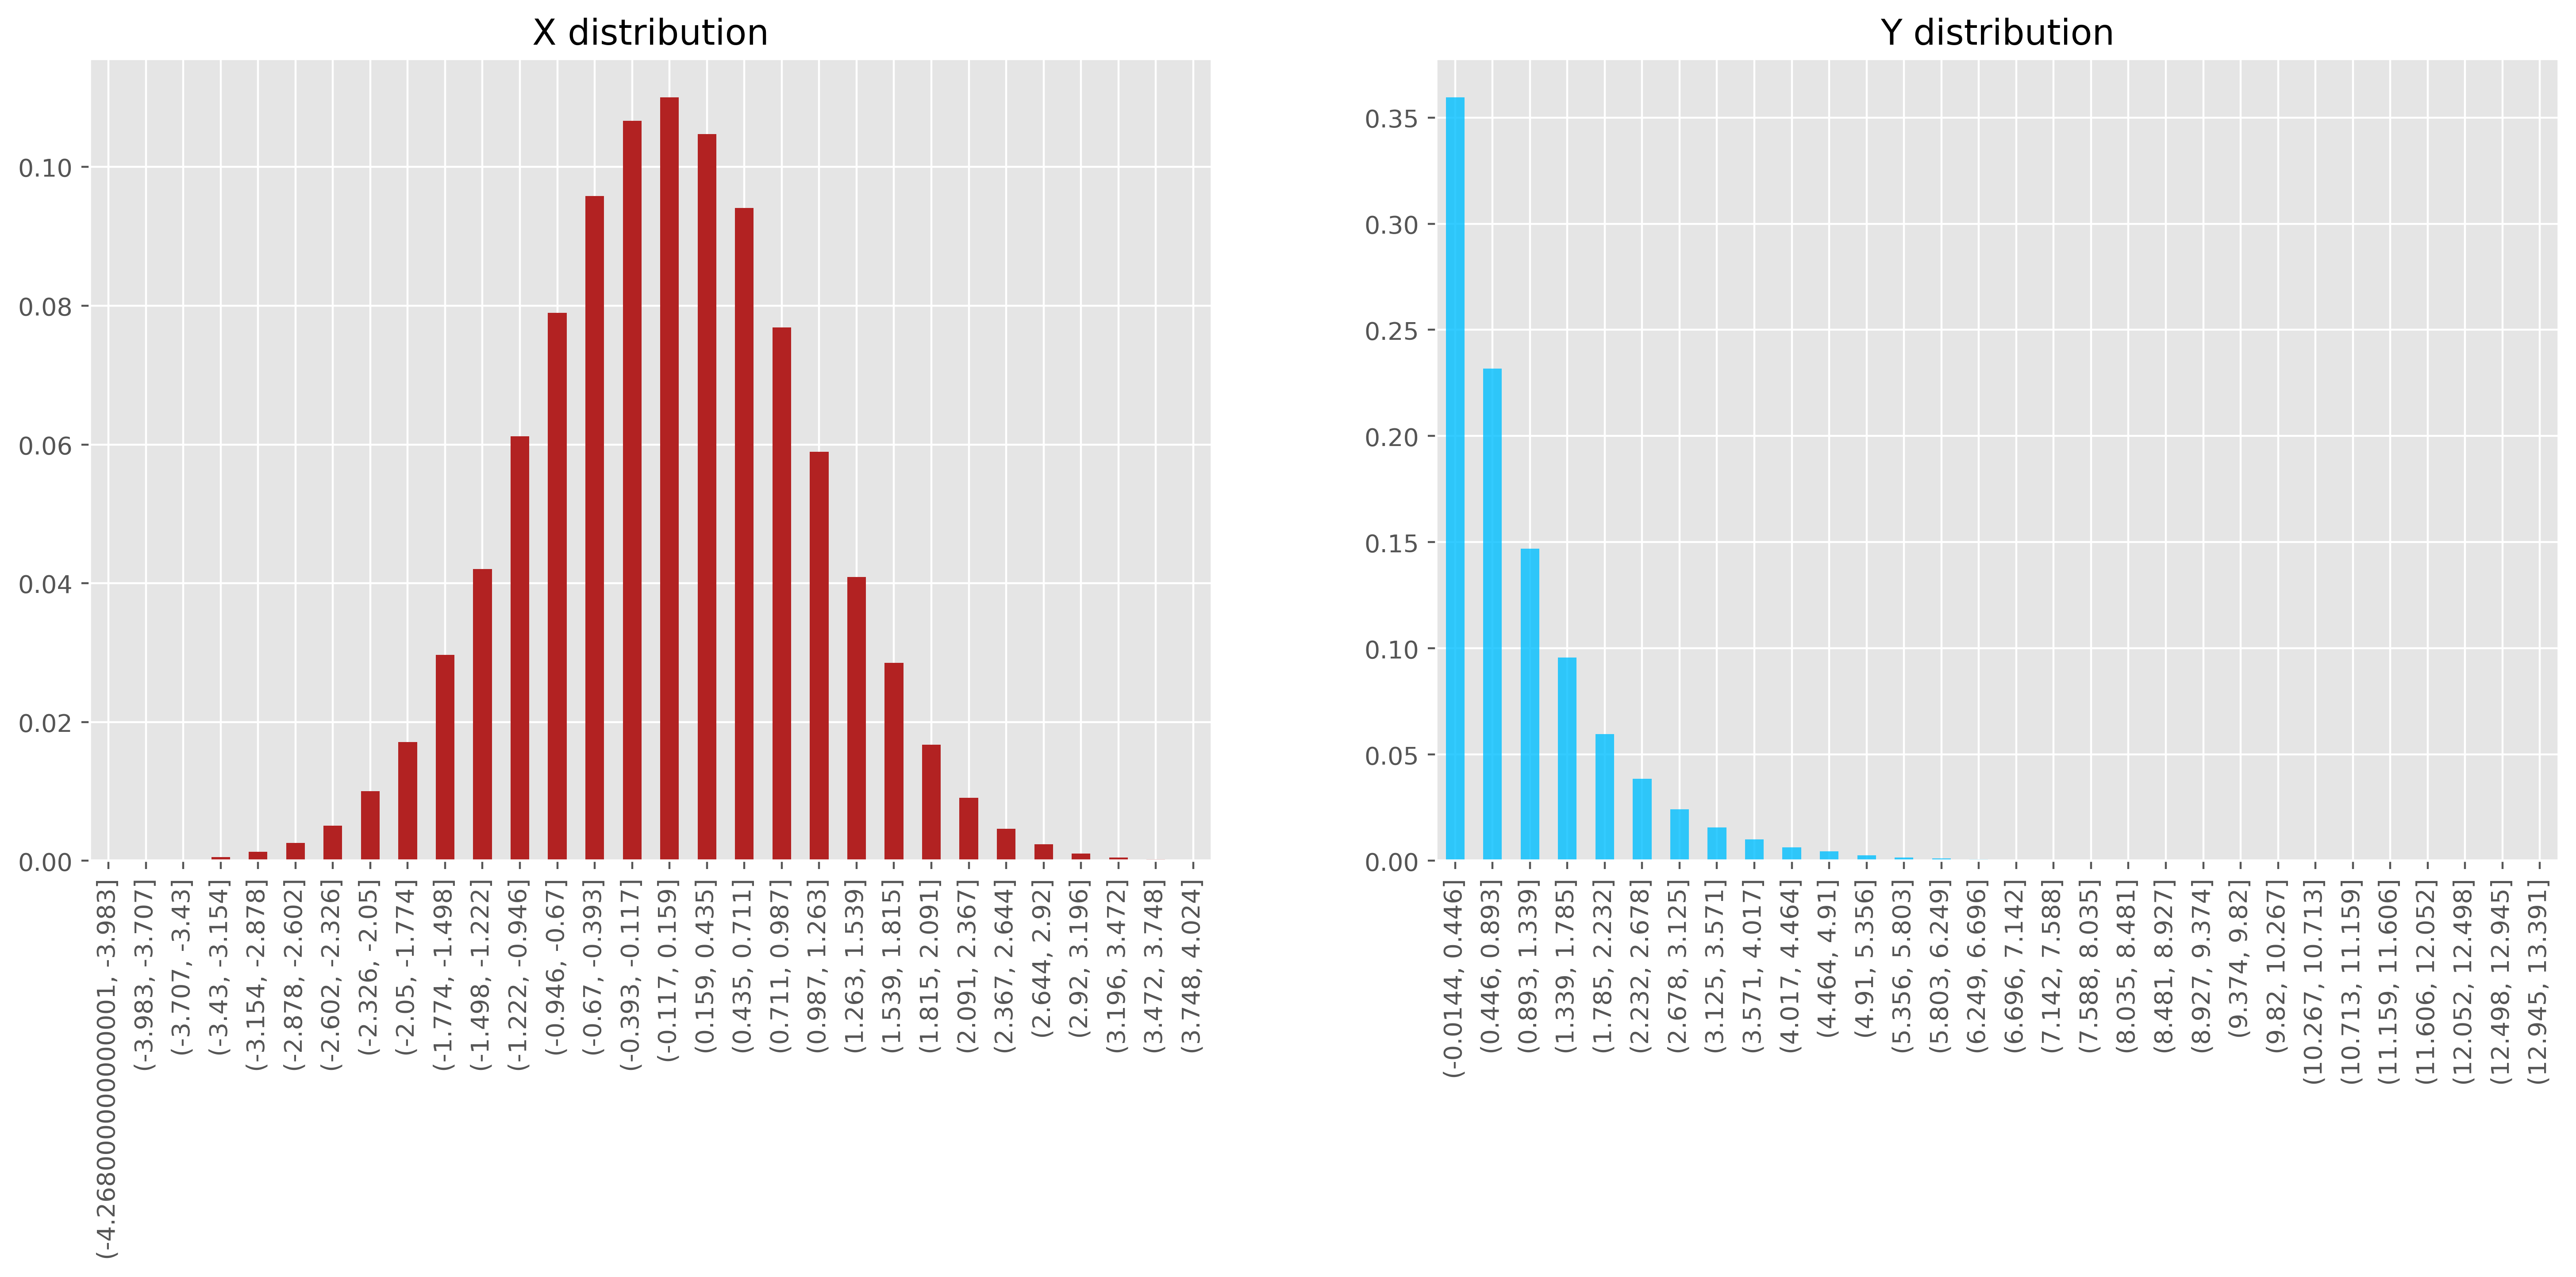

In [167]:
rvs = pd.DataFrame({'X':X})
rvs2 = pd.DataFrame({'Y':Y})
fig, ax = plt.subplots(1, 2, figsize=(18,6), dpi = 400)
X_distrib = rvs['X'].value_counts(bins = 30,sort = False, normalize = True)
Y_distrib = rvs2['Y'].value_counts(bins = 30,sort = False, normalize = True)
cs1 = X_distrib.plot(kind = 'bar', ax = ax[0], color = 'firebrick', title = 'X distribution')
cs2 = Y_distrib.plot(kind = 'bar', ax = ax[1], color = 'deepskyblue', alpha = 0.8, title = 'Y distribution')

## Q2.2

The Box-muller is easy to operate since we can just use the formula without any loops, and it is easy to have a unifrom r.v. but the cons is that it could only use uniform to generate normal. It is a bit narrow.

The Acceptance-Rejection can be used to generate any r.v. by using a known r.v., so it is wider and generater. But the pdf of a r.v. is difficult to obtain so it is one the the cons.

****
****
# Q3

## Q3.1

In [168]:
num = 1000000
X = np.random.standard_normal(num)

### With Monte Carlo methods and non importance sampling

In [169]:
p1 = sum(X > 8) / num
print("The prob with Monte Carlo methods and non importance sampling: ", p1)

The prob with Monte Carlo methods and non importance sampling:  0.0


### With Monte Carlo methods and importance sampling

In [170]:
X_hat = X + 8
p2 = sum((X_hat>8)*np.exp((0.5*8**2)-8*X_hat)) / num
print("The prob with Monte Carlo methods and importance sampling: ", p2)

The prob with Monte Carlo methods and importance sampling:  6.218170146831588e-16


## Q3.2

The Monte Carlo methods without importance sampling is used to identify a distribution or sampling in some values closed to the mean, it is its pro. But the con is that it can't sampling a value that far from the mean so it might take a long time to do so.
But the Carlo methods with importance sampling,  we may use a new distribution to find further data. But we can't know the original distribution easily.